<a href="https://colab.research.google.com/github/nshutielise/Data-Science-Personal-Projects/blob/main/Credit_Score_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Prediction using Machine Learning**

**Here are the Factors that are mostily considered.**



1.   Gender

1.   Education

1.   Marrital Status

1.   Loan Amount

2.   Credit History

2.   Account Balance

2.   Property Area

2.   Dependants

2.   Self Employment status




***Step 1: Data Preprocessing***

In [209]:
import pandas as pd
import numpy as np


In [210]:
train_data = pd.read_csv("/content/drive/MyDrive/CreditScore/train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [211]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [212]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [213]:
train_data.shape

(614, 13)

In [214]:
train_data.Dependents.dtypes

dtype('O')

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [216]:
# Label Encode
# label encoding for gender
train_data.Gender = train_data.Gender.map({'Male':1, 'Female': 0})
train_data.Gender.value_counts()

Gender
1.0    489
0.0    112
Name: count, dtype: int64

In [217]:
#Labelling for marital status
train_data.Married = train_data.Married.map({'Yes':1, 'No':0})

In [218]:
train_data.Married.value_counts()


Married
1.0    398
0.0    213
Name: count, dtype: int64

In [219]:
#Label for dependents
train_data.Dependents = train_data.Dependents.map({'0': 0, '1':1, '2':2, '3':3})

In [220]:
train_data.Dependents.value_counts()

Dependents
0.0    345
1.0    102
2.0    101
Name: count, dtype: int64

In [221]:
#Labelling for education status
train_data.Education = train_data.Education.map({'Graduate':1, 'Not Graduate':0})

In [222]:
train_data.Education.value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [223]:
#Label Employement status
train_data.Self_Employed = train_data.Self_Employed.map({'Yes':1, 'No':0})

In [224]:
train_data.Self_Employed.value_counts()

Self_Employed
0.0    500
1.0     82
Name: count, dtype: int64

In [225]:
train_data.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [226]:
#labeling for property area
train_data.Property_Area = train_data.Property_Area.map({'Urban':2, 'Rural':0, 'Semiurban':1})

In [227]:
train_data.Property_Area.value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [228]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [229]:
train_data.Credit_History.fillna(np.random.randint(0,2), inplace=True) # filling up the nan values with 0 and 1

In [230]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [231]:
train_data.Married.fillna(np.random.randint(0,2), inplace=True)

In [232]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [233]:
train_data.LoanAmount.fillna(train_data.LoanAmount.median(), inplace=True)

In [234]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [235]:
train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.mean(), inplace=True)

In [236]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [237]:
train_data.Dependents.fillna(train_data.Dependents.median(), inplace=True)

In [238]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [239]:
train_data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [240]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [241]:
train_data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [242]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [243]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [244]:
# Drop unnecessary columns
train_data.drop('Loan_ID', inplace=True, axis=1)

In [245]:
#labeling for loan status
train_data.Loan_Status = train_data.Loan_Status.map({'Y':1, 'N':0})

In [246]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


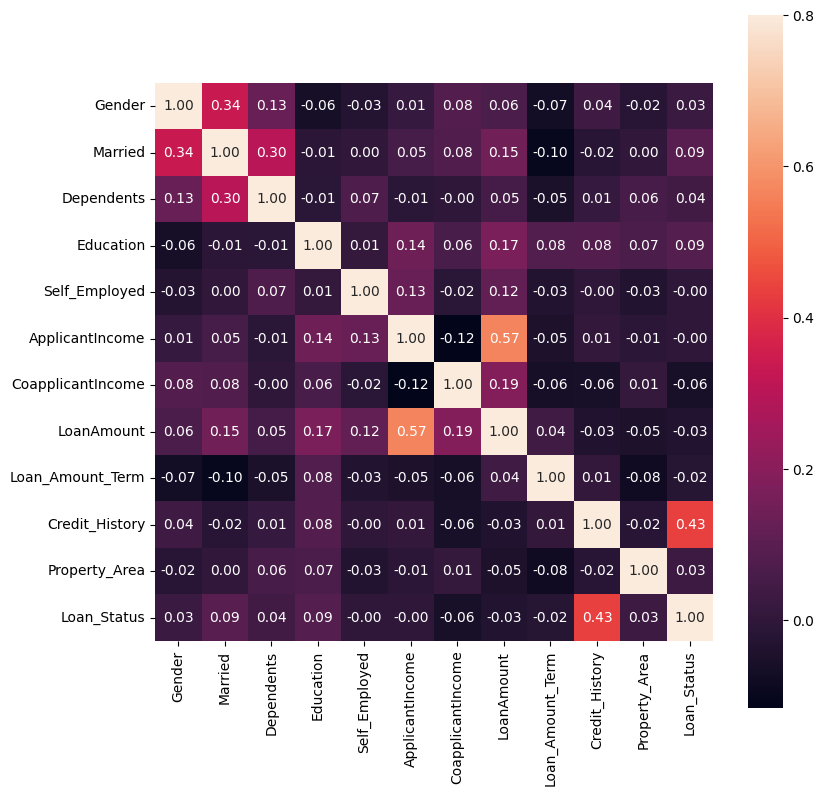

In [247]:
corrm = train_data.corr()

# Create a matplotlib figure and axis with the desired size
f, ax = plt.subplots(figsize=(9, 9))

# Generate a heatmap with seaborn, specifying the maximum value for color scaling and making the heatmap square
sns.heatmap(corrm, vmax=.8, square=True, annot=True, fmt='.2f')

# Show the plot (necessary if running outside of a Jupyter notebook)
plt.show()

**Split the Data into X and Y**

In [248]:
# Define the target variable (Y) and the features (X)
Y = train_data['Loan_Status']
X = train_data.drop('Loan_Status', axis=1)

# Display the shapes of X and Y to verify the split
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')


Shape of X: (614, 11)
Shape of Y: (614,)


In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [250]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,1.0,1.0,0.0,0,0.0,2454,2333.0,181.0,360.0,0.0,2
601,1.0,1.0,0.0,0,0.0,2894,2792.0,155.0,360.0,1.0,0
261,1.0,0.0,0.0,1,0.0,2060,2209.0,134.0,360.0,1.0,1
496,1.0,1.0,0.0,0,0.0,2600,1700.0,107.0,360.0,1.0,0
529,1.0,0.0,0.0,0,0.0,6783,0.0,130.0,360.0,1.0,1


In [257]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [251]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1.0,1.0,0.0,1,0.0,9083,0.0,228.0,360.0,1.0,1
377,1.0,1.0,0.0,1,0.0,4310,0.0,130.0,360.0,0.0,1
163,1.0,1.0,2.0,1,0.0,4167,1447.0,158.0,360.0,1.0,0
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0
132,1.0,0.0,0.0,1,0.0,2718,0.0,70.0,360.0,1.0,1


In [256]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

**Using different types of Machine Learning Model for prediction**

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


**Fit all models**

In [253]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import pickle

# Suppress all warnings
warnings.filterwarnings("ignore")


# Define the feature matrix (X) and target vector (Y)
X = train_data.drop(columns=['Loan_Status'])
Y = train_data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier()
}

# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    # Print results
    print(f'{name} Model:')
    print(f'Accuracy: {accuracy}')
    print("")
    print('Confusion Matrix:')
    print(conf_matrix)
    # Generate classification report
    report = classification_report(Y_test, Y_pred)

    # Print the classification report
    print("")
    print('Classification Report:')
    print(report)
    print('--------------------------------------------')

# Initialize the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, Y_train)

# Define the file path to save the model
file_path = '/content/drive/MyDrive/CreditScore/logistic_regression_model.pkl'

# Save the trained model to the specified file path
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

# Print confirmation
print(f"Logistic Regression model saved successfully at {file_path}")

# Load the model from the file
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
Y_pred = loaded_model.predict(X_test)

# Print the predictions
print('Predictions:')
print(Y_pred)

# Generate classification report
report = classification_report(Y_test, Y_pred, zero_division=0)  # Add zero_division=0 to handle undefined metrics

# Print the classification report
print('Classification Report for Logistic Regression:')
print(report)

Logistic Regression Model:
Accuracy: 0.7675675675675676

Confusion Matrix:
[[ 34  31]
 [ 12 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        65
           1       0.78      0.90      0.83       120

    accuracy                           0.77       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.76      0.77      0.76       185

--------------------------------------------
Decision Tree Model:
Accuracy: 0.6

Confusion Matrix:
[[21 44]
 [30 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        65
           1       0.67      0.75      0.71       120

    accuracy                           0.60       185
   macro avg       0.54      0.54      0.54       185
weighted avg       0.58      0.60      0.59       185

--------------------------------------------
Support Vector Machine Model:
Accurac